<a href="https://colab.research.google.com/github/Rachit180/FER/blob/updated/fer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax,Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Input, ZeroPadding2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import load_model

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [5]:
data = pd.read_csv('/content/fer2013.csv')
path='/content/fer2013.csv'

In [6]:
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
# Split the pixel values into lists
train_pixels = data['pixels'].str.split(" ").tolist()

# Find the maximum length of lists
max_length = max(len(pixels) for pixels in train_pixels)

# Pad the lists with zeros to make them of equal length
train_pixels = [pixels + ['0'] * (max_length - len(pixels)) for pixels in train_pixels]

# Convert the list of lists to numpy array of uint8
train_pixels = np.uint8(train_pixels)


In [8]:
import numpy as np

# Iterate over the dataset to extract pixel values
train_pixels = []
max_length = 0  # Initialize maximum length to 0
for index, row in data.iterrows():
    pixels = row['pixels'].split(" ")
    pixels = [int(pixel) for pixel in pixels]
    train_pixels.append(pixels)
    if len(pixels) > max_length:
        max_length = len(pixels)

# Pad the lists with zeros to make them of equal length
for pixels in train_pixels:
    pixels.extend([0] * (max_length - len(pixels)))

# Convert the list of lists to numpy array
train_pixels = np.uint8(train_pixels)


In [9]:
def create(num):
  image = train_pixels[num]
  grid = image.reshape((48, 48))
  plt.imshow(grid, cmap='viridis')
  plt.title(data['emotion'][num])

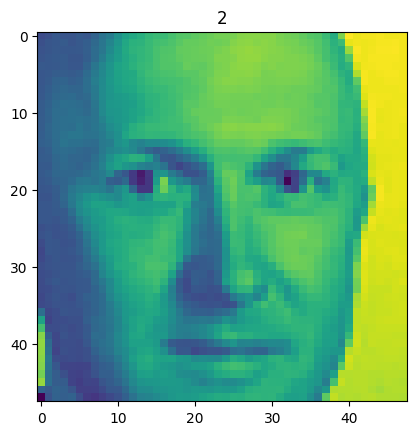

In [10]:
create(33)

In [11]:
x_data = data['pixels']
y_data = data['emotion']

y_data.value_counts()

,count
emotion,
3,8989
6,6198
4,6077
2,5121
0,4953
5,4002
1,547


In [12]:
from imblearn.over_sampling import SMOTE

oversampler = RandomOverSampler(sampling_strategy='all')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [13]:
x_data = pd.Series(x_data.flatten())
x_data

,0
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...
62918,175 174 176 176 176 175 174 176 174 176 175 17...
62919,79 45 37 43 35 36 37 41 60 65 74 78 78 85 103 ...
62920,153 61 38 22 18 32 36 24 24 77 130 160 167 165...
62921,86 92 94 109 123 141 155 163 137 120 134 143 1...


In [14]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data /= 255
print(x_data[:10])

[[0.27450982 0.3137255  0.32156864 ... 0.41568628 0.42745098 0.32156864]
 [0.5921569  0.5882353  0.5764706  ... 0.75686276 0.7176471  0.72156864]
 [0.90588236 0.83137256 0.6117647  ... 0.34509805 0.43137255 0.59607846]
 ...
 [0.3019608  0.30588236 0.30980393 ... 0.49019608 0.2627451  0.26666668]
 [0.33333334 0.32941177 0.3529412  ... 0.22745098 0.28627452 0.32941177]
 [1.         0.99607843 1.         ... 0.99607843 1.         1.        ]]


In [15]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [16]:
y_data = np.array(y_data)
print(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape
print(y_data)

[0 0 2 ... 6 6 6]
[[0]
 [0]
 [2]
 ...
 [6]
 [6]
 [6]]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D

model = Sequential()

# Input Layer
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(48, 48, 1), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(200, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(
    optimizer=Nadam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,327 (454.40 KB)

 Trainable params: 116,327 (454.40 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras import layers
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
#    # Conv2D then ReLU activation
#     x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    return x
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p
def upsample_block(x, conv_features, n_filters):
   # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
    x = layers.concatenate([x, conv_features])
   # dropout
    x = layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def build_unet_model():
    inputs = layers.Input(shape=(48,48,1))
   # encoder: contracting path - downsample
   # 1 - downsample
    f1, p1 = downsample_block(inputs, 8)
   # 2 - downsample
    f2, p2 = downsample_block(p1, 16)
   # 3 - downsample
    f3, p3 = downsample_block(p2, 32)
   # 4 - downsample

#     f4, p4 = downsample_block(p3, 64)

   # 5 - bottleneck
    bottleneck = double_conv_block(p3, 64)
   # decoder: expanding path - upsample
   # 6 - upsample
#     u6 = upsample_block(bottleneck, f4, 64)
   # 7 - upsample
    u7 = upsample_block(bottleneck, f3, 32)
   # 8 - upsample
    u8 = upsample_block(u7, f2, 16)
   # 9 - upsample
    u9 = upsample_block(u8, f1, 8)

   # outputs
    gap = layers.GlobalAveragePooling2D()(u9)

#     o = layers.Flatten()(u9)
#     o1 = layers.Dense(10, activation = "relu")(o)
    outputs = layers.Dense(7, activation = "softmax")(gap)
#     outouts=layers.Flatten()
   # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [20]:
from tensorflow.keras import layers

def conv_block(x, n_filters, strides=(1, 1)):
    shortcut = x

    x = layers.Conv2D(n_filters, 3, strides=strides, padding='same', activation=None, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(n_filters, 3, strides=(1, 1), padding='same', activation=None, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    if strides != (1, 1) or shortcut.shape[-1] != n_filters:
        shortcut = layers.Conv2D(n_filters, 1, strides=strides, padding='valid', activation=None, kernel_initializer='he_normal')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

def build_resnet_model():
    inputs = layers.Input(shape=(48, 48, 1))

    x = layers.Conv2D(64, 7, strides=(2, 2), padding='same', activation=None, kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Stage 1
    x = conv_block(x, 64, strides=(1, 1))
    x = conv_block(x, 64, strides=(1, 1))

    # Stage 2
    x = conv_block(x, 128, strides=(2, 2))
    x = conv_block(x, 128, strides=(1, 1))

    # Stage 3
    x = conv_block(x, 256, strides=(2, 2))
    x = conv_block(x, 256, strides=(1, 1))

    # Stage 4
    x = conv_block(x, 512, strides=(2, 2))
    x = conv_block(x, 512, strides=(1, 1))

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Output
    outputs = layers.Dense(7, activation='softmax')(x)

    # ResNet model with Keras Functional API
    resnet_model = tf.keras.Model(inputs, outputs, name='ResNet')

    return resnet_model


In [21]:
resnet_model = build_resnet_model()
resnet_model.summary()

Model: "ResNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 24,    │      3,200 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 24, 24,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 24, 24,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 12, 12,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 12, 12,    │     36,928 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 12, 12,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 12, 12,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 12, 12,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 12, 12,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │        256 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 12, 12,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 12, 12,    │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │        256 │ conv2d_9[0][0]  

 Total params: 11,188,231 (42.68 MB)

 Trainable params: 11,178,631 (42.64 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [22]:
unet_model = build_unet_model()
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 48, 48, 8) │         80 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 24, 24, 8) │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 24, 24, 8) │          0 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 24, 24,    │      1,168 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 12, 12,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 12, 12,    │          0 │ max_pooling2d_5[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 12, 12,    │      4,640 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 6, 6, 32)  │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 6, 6, 32)  │          0 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 6, 6, 64)  │     18,496 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 12, 12,    │     18,464 │ conv2d_28[0][0]   │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 12, 12,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 64)               │            │ conv2d_27[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 12, 12,    │          0 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 12, 12,    │     18,464 │ dropout_3[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 24, 24,    │      4,624 │ conv2d_29[0][0]   │
│ (Conv2DTranspose)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 24, 24,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 32)               │            │ conv2d_26[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 24, 24,    │          0 │ concatenate_1[0]… │
│                     │ 32)               │            │                 

 Total params: 72,943 (284.93 KB)

 Trainable params: 72,943 (284.93 KB)

 Non-trainable params: 0 (0.00 B)

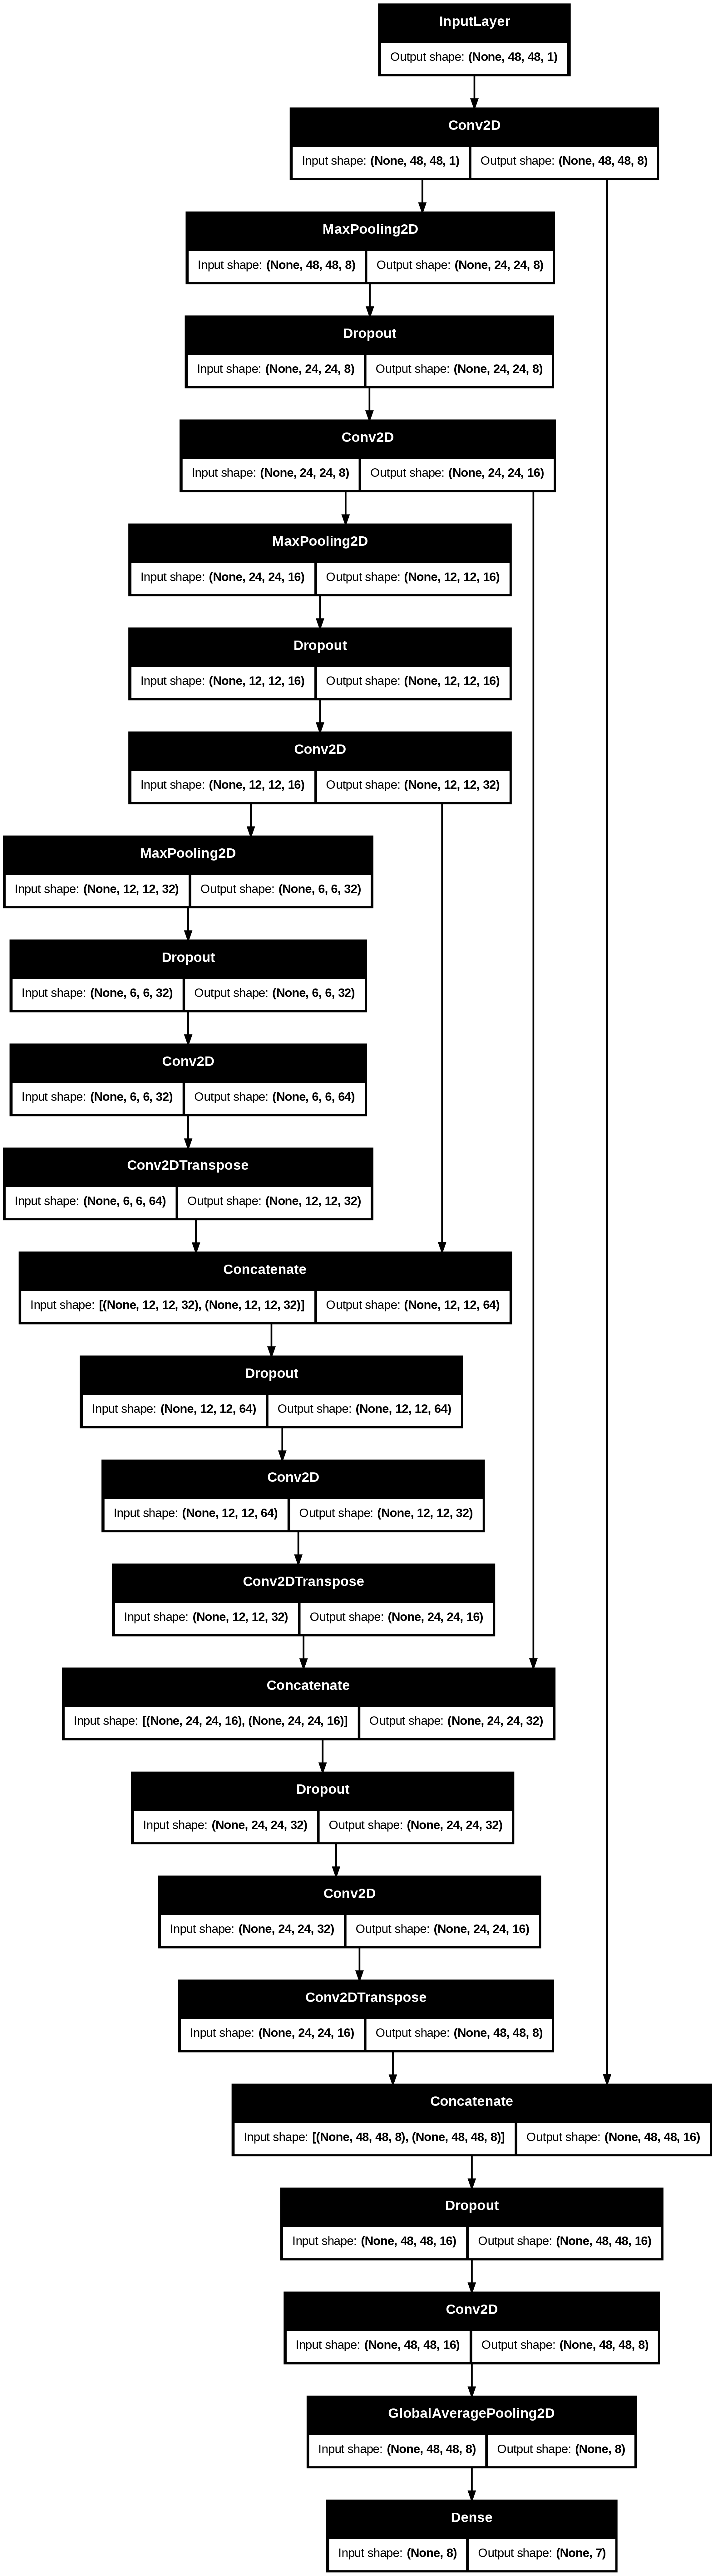

In [23]:
tf.keras.utils.plot_model(unet_model, show_shapes=True)

In [24]:
nag = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
unet_model.compile(optimizer=Nadam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
print(y_train.shape)
y_train = y_train.reshape((-1,1))
print(y_train.shape)
y_test = y_test.reshape((-1,1))

(45304, 1)
(45304, 1)


In [26]:
print(y_train.shape)
y_train = to_categorical(y_train, 7)

print(y_train.shape)

(45304, 1)
(45304, 7)


In [27]:
y_test = to_categorical(y_test, 7)
y_test.shape

(12585, 7)

In [28]:
y_val = to_categorical(y_val, 7)
y_val.shape

(5034, 7)

In [29]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 10),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [30]:
history = unet_model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=(X_val, y_val))

Epoch 1/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.1665 - loss: 1.9315
Epoch 1: val_accuracy improved from -inf to 0.18276, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 305s 420ms/step - accuracy: 0.1665 - loss: 1.9315 - val_accuracy: 0.1828 - val_loss: 1.9279
Epoch 2/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.2096 - loss: 1.8874
Epoch 2: val_accuracy improved from 0.18276 to 0.24871, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 298s 421ms/step - accuracy: 0.2096 - loss: 1.8874 - val_accuracy: 0.2487 - val_loss: 1.8183
Epoch 3/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.2567 - loss: 1.8204
Epoch 3: val_accuracy improved from 0.24871 to 0.28625, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 335s 440ms/step - accuracy: 0.2567 - loss: 1.8204 - val_accuracy: 0.2863 - val_loss: 1.7686
Epoch 4/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.2868 - loss: 1.7714
Epoch 4: val_accuracy did not improve from 0.28625
708/708 ━━━━━━━━━━━━━━━━━━━━ 321s 439ms/step - accuracy: 0.2868 - loss: 1.7714 - val_accuracy: 0.2799 - val_loss: 1.7705
Epoch 5/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.2932 - loss: 1.7513
Epoch 5: val_accuracy did not improve from 0.28625
708/708 ━━━━━━━━━━━━━━━━━━━━ 324s 441ms/step - accuracy: 0.2932 - loss: 1.7513 - val_accuracy: 0.2861 - val_loss: 1.7572
Epoch 6/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.3120 - loss: 1.7207
Epoch 6: val_accuracy improved from 0.28625 to 0.30572, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 322s 441ms/step - accuracy: 0.3120 - loss: 1.7207 - val_accuracy: 0.3057 - val_loss: 1.6989
Epoch 7/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.3235 - loss: 1.7020
Epoch 7: val_accuracy improved from 0.30572 to 0.32499, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 336s 460ms/step - accuracy: 0.3235 - loss: 1.7020 - val_accuracy: 0.3250 - val_loss: 1.6789
Epoch 8/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.3360 - loss: 1.6798
Epoch 8: val_accuracy did not improve from 0.32499
708/708 ━━━━━━━━━━━━━━━━━━━━ 332s 469ms/step - accuracy: 0.3360 - loss: 1.6798 - val_accuracy: 0.2942 - val_loss: 1.7795
Epoch 9/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.3410 - loss: 1.6727
Epoch 9: val_accuracy did not improve from 0.32499
708/708 ━━━━━━━━━━━━━━━━━━━━ 359s 437ms/step - accuracy: 0.3410 - loss: 1.6727 - val_accuracy: 0.3089 - val_loss: 1.7283
Epoch 10/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3506 - loss: 1.6530
Epoch 10: val_accuracy improved from 0.32499 to 0.35360, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 311s 439ms/step - accuracy: 0.3506 - loss: 1.6530 - val_accuracy: 0.3536 - val_loss: 1.6305
Epoch 11/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.3624 - loss: 1.6402
Epoch 11: val_accuracy improved from 0.35360 to 0.38399, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 320s 436ms/step - accuracy: 0.3624 - loss: 1.6401 - val_accuracy: 0.3840 - val_loss: 1.5945
Epoch 12/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.3674 - loss: 1.6191
Epoch 12: val_accuracy did not improve from 0.38399
708/708 ━━━━━━━━━━━━━━━━━━━━ 313s 442ms/step - accuracy: 0.3674 - loss: 1.6191 - val_accuracy: 0.3739 - val_loss: 1.6241
Epoch 13/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.3753 - loss: 1.6036
Epoch 13: val_accuracy improved from 0.38399 to 0.39789, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 318s 438ms/step - accuracy: 0.3753 - loss: 1.6035 - val_accuracy: 0.3979 - val_loss: 1.5457
Epoch 14/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.3872 - loss: 1.5940
Epoch 14: val_accuracy improved from 0.39789 to 0.41776, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 320s 435ms/step - accuracy: 0.3872 - loss: 1.5940 - val_accuracy: 0.4178 - val_loss: 1.5275
Epoch 15/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.3823 - loss: 1.5876
Epoch 15: val_accuracy did not improve from 0.41776
708/708 ━━━━━━━━━━━━━━━━━━━━ 312s 441ms/step - accuracy: 0.3823 - loss: 1.5876 - val_accuracy: 0.4060 - val_loss: 1.5512
Epoch 16/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.3891 - loss: 1.5748
Epoch 16: val_accuracy improved from 0.41776 to 0.42014, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 308s 435ms/step - accuracy: 0.3891 - loss: 1.5748 - val_accuracy: 0.4201 - val_loss: 1.5305
Epoch 17/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.3907 - loss: 1.5708
Epoch 17: val_accuracy did not improve from 0.42014
708/708 ━━━━━━━━━━━━━━━━━━━━ 322s 435ms/step - accuracy: 0.3907 - loss: 1.5708 - val_accuracy: 0.4102 - val_loss: 1.5089
Epoch 18/60
379/708 ━━━━━━━━━━━━━━━━━━━━ 2:20 427ms/step - accuracy: 0.4016 - loss: 1.5542

KeyboardInterrupt: 

In [31]:
# Evaluate U-Net model accuracy
print("Accuracy of U-Net model on test data: ", unet_model.evaluate(X_test, y_test)[1] * 100, "%")

394/394 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4196 - loss: 1.5164
Accuracy of U-Net model on test data:  42.49503314495087 %


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Predict the segmentation masks for test data
y_pred = unet_model.predict(X_test)

# Convert predicted masks to binary class labels (Thresholding)
y_pred_classes = (y_pred > 0.5).astype(int)  # If binary segmentation (sigmoid activation)
y_true_classes = (y_test > 0.5).astype(int)

# Flatten the arrays for metric calculation
y_pred_flat = y_pred_classes.flatten()
y_true_flat = y_true_classes.flatten()

# Compute performance metrics
precision = precision_score(y_true_flat, y_pred_flat, average='weighted', zero_division=1)
recall = recall_score(y_true_flat, y_pred_flat, average='weighted', zero_division=1)
f1 = f1_score(y_true_flat, y_pred_flat, average='weighted', zero_division=1)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

394/394 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step
Precision: 0.8604
Recall: 0.8748
F1 Score: 0.8411


In [33]:
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=(X_val, y_val))

Epoch 1/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.1974 - loss: 1.8933
Epoch 1: val_accuracy did not improve from 0.42014
708/708 ━━━━━━━━━━━━━━━━━━━━ 422s 590ms/step - accuracy: 0.1975 - loss: 1.8931 - val_accuracy: 0.3959 - val_loss: 1.5547
Epoch 2/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.4391 - loss: 1.4816
Epoch 2: val_accuracy improved from 0.42014 to 0.50616, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 437s 582ms/step - accuracy: 0.4392 - loss: 1.4815 - val_accuracy: 0.5062 - val_loss: 1.3068
Epoch 3/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.5406 - loss: 1.2212
Epoch 3: val_accuracy improved from 0.50616 to 0.55125, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 416s 588ms/step - accuracy: 0.5406 - loss: 1.2211 - val_accuracy: 0.5513 - val_loss: 1.1948
Epoch 4/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.5962 - loss: 1.0607
Epoch 4: val_accuracy improved from 0.55125 to 0.59237, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 434s 577ms/step - accuracy: 0.5962 - loss: 1.0606 - val_accuracy: 0.5924 - val_loss: 1.0664
Epoch 5/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.6218 - loss: 0.9841
Epoch 5: val_accuracy improved from 0.59237 to 0.59317, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 441s 575ms/step - accuracy: 0.6219 - loss: 0.9840 - val_accuracy: 0.5932 - val_loss: 1.0887
Epoch 6/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.6549 - loss: 0.9083
Epoch 6: val_accuracy improved from 0.59317 to 0.62555, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 452s 589ms/step - accuracy: 0.6549 - loss: 0.9083 - val_accuracy: 0.6255 - val_loss: 0.9680
Epoch 7/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.6726 - loss: 0.8602
Epoch 7: val_accuracy improved from 0.62555 to 0.63449, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 417s 589ms/step - accuracy: 0.6726 - loss: 0.8602 - val_accuracy: 0.6345 - val_loss: 0.9929
Epoch 8/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.6935 - loss: 0.8122
Epoch 8: val_accuracy improved from 0.63449 to 0.64482, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 405s 572ms/step - accuracy: 0.6935 - loss: 0.8123 - val_accuracy: 0.6448 - val_loss: 0.9400
Epoch 9/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.7114 - loss: 0.7648
Epoch 9: val_accuracy improved from 0.64482 to 0.65892, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 452s 586ms/step - accuracy: 0.7114 - loss: 0.7648 - val_accuracy: 0.6589 - val_loss: 0.9147
Epoch 10/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.7272 - loss: 0.7306
Epoch 10: val_accuracy improved from 0.65892 to 0.67461, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 407s 575ms/step - accuracy: 0.7272 - loss: 0.7306 - val_accuracy: 0.6746 - val_loss: 0.8995
Epoch 11/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.7513 - loss: 0.6744
Epoch 11: val_accuracy improved from 0.67461 to 0.67978, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 450s 587ms/step - accuracy: 0.7513 - loss: 0.6745 - val_accuracy: 0.6798 - val_loss: 0.8942
Epoch 12/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.7654 - loss: 0.6329
Epoch 12: val_accuracy improved from 0.67978 to 0.69388, saving model to best_model.h5


708/708 ━━━━━━━━━━━━━━━━━━━━ 431s 572ms/step - accuracy: 0.7654 - loss: 0.6329 - val_accuracy: 0.6939 - val_loss: 0.8707
Epoch 13/60
708/708 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.7867 - loss: 0.5881
Epoch 13: val_accuracy did not improve from 0.69388
708/708 ━━━━━━━━━━━━━━━━━━━━ 442s 572ms/step - accuracy: 0.7867 - loss: 0.5881 - val_accuracy: 0.6905 - val_loss: 0.8822
Epoch 14/60
350/708 ━━━━━━━━━━━━━━━━━━━━ 3:20 559ms/step - accuracy: 0.8118 - loss: 0.5250

KeyboardInterrupt: 

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Calculate performance metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

394/394 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step
Accuracy: 70.25%
Precision: 0.7130
Recall: 0.7025
F1 Score: 0.7033


In [35]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

394/394 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.7006 - loss: 0.9072
Accuracy of our model on test data :  70.2502965927124 %


In [36]:
model.save(f'fer_2013_{accuracy:.2f}_cnn.keras')

In [37]:
model.save('fer_2013_74.60_resnet.keras')